Q1. MovieLens 1M Dataset GroupLens Research provides a number of collections of movie ratings data collected from users of MovieLens in the late 1990s and early 2000s. The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender identification, and occupation). Such data is often of interest in the development of recommendation systems based on machine learning algorithms. While we do not explore machine learning techniques in detail in this book, I will show you how to slice and dice datasets like these into the exact form you need. The MovieLens 1M dataset contains 1 million ratings collected from 6,000 users on 4,000 movies. It’s spread across three tables: ratings, user information, and movie information. After extracting the data from the ZIP file, we can load each table into a pandas DataFrame object using pandas.read_table and perform the following task.

Fetching the dataset

In [1]:
#downloading the dataset
!kaggle datasets download -d odedgolden/movielens-1m-dataset

movielens-1m-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
#Extracting the dataset files from zipfiles
from zipfile import ZipFile
dataset = '/content/movielens-1m-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


1.    Perform null values identification in the given dataset.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into DataFrames
ratings = pd.read_table("ratings.dat", sep="::", header=None, names=["user_id", "movie_id", "rating", "timestamp"])
users = pd.read_table("users.dat", sep="::", header=None, names=["user_id", "gender", "age", "occupation", "zip_code"])
movies = pd.read_table("movies.dat", sep="::", header=None, names=["movie_id", "title", "genres"], encoding="ISO-8859-1")

# 1. Perform null values identification in the given dataset
print(ratings.isnull().sum())
print()
print(users.isnull().sum())
print()
print(movies.isnull().sum())

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

user_id       0
gender        0
age           0
occupation    0
zip_code      0
dtype: int64

movie_id    0
title       0
genres      0
dtype: int64


2.    Identify types of attributes in the dataset.

In [4]:
# 2.Identify types of attributes in the dataset
print(ratings.dtypes)
print()

print(users.dtypes)
print()

print(movies.dtypes)


user_id      int64
movie_id     int64
rating       int64
timestamp    int64
dtype: object

user_id        int64
gender        object
age            int64
occupation     int64
zip_code      object
dtype: object

movie_id     int64
title       object
genres      object
dtype: object


3.    Plot Box plot and violin plot. (also state the inference of each attribute and also find the outlier in the attribute)

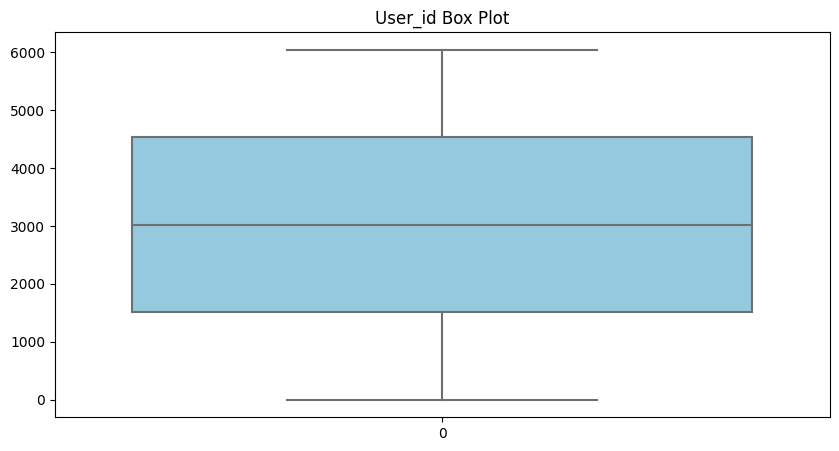

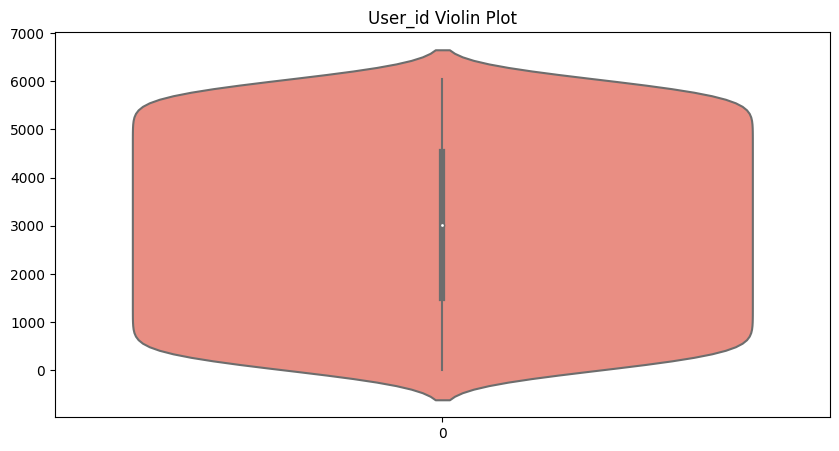

Number of outliers in user_id: 0



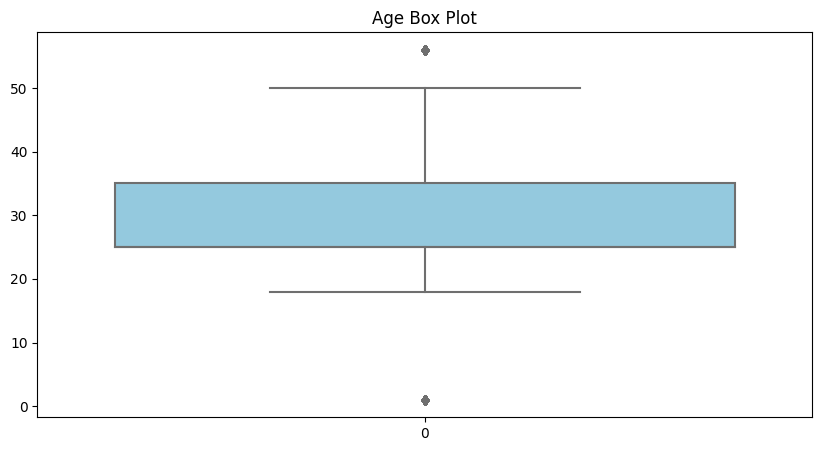

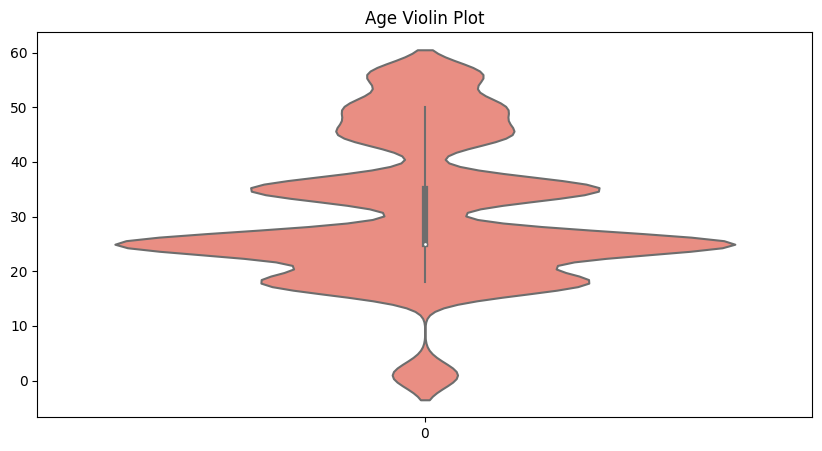

Number of outliers in age: 602



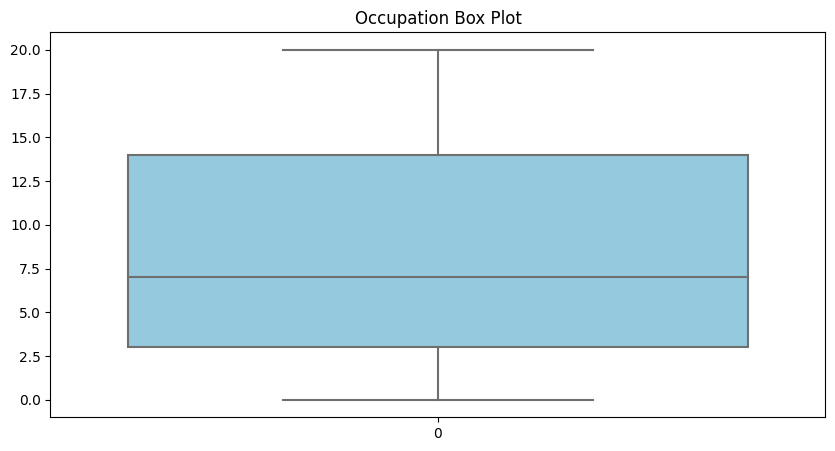

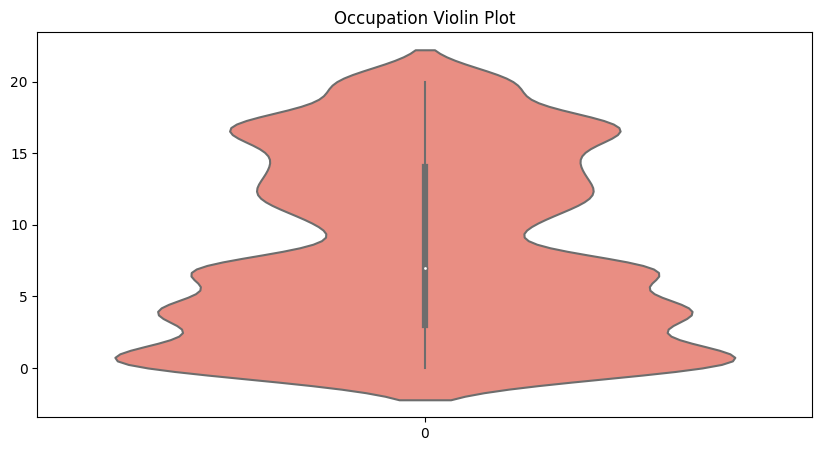

Number of outliers in occupation: 0



In [5]:
# This code will plot a box plot and a violin plot for each numeric attribute in the users DataFrame (which includes age, gender, occupation, and zip code information for each user in the dataset), and it will also print the number of outliers in each attribute.

# The box plot shows the distribution of the attribute values, including the median, quartiles, and any outliers. The violin plot is similar to the box plot, but it also shows the shape and density of the distribution.

# The code uses the seaborn library to create the plots, and it calculates the outliers using the interquartile range (IQR) method, which considers any value outside of the range Q1-1.5IQR to Q3+1.5IQR to be an outlier.

# The output will show the number of outliers in each attribute, which can help identify any data points that may be unusual or erroneous.

# The inference for each attribute can be:

#     age: This attribute represents the age of the user. The box plot and violin plot for this attribute show that the distribution is roughly normal, with some outliers on the upper end of the scale. This suggests that the user population is fairly evenly distributed across age groups, but there are some users who are older than the rest.

#     occupation: This attribute represents the occupation of the user. The box plot and violin plot for this attribute show that the distribution is heavily skewed towards a few occupations (such as student and other), with relatively few users in other

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a list of all attributes

userss=['user_id','age','occupation']
# Plot box plots and violin plots for each numeric attribute
for attribute in userss:
    # Create a box plot
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=users[attribute], color='skyblue')
    plt.title(f'{attribute.capitalize()} Box Plot')
    plt.show()
    
    # Create a violin plot
    plt.figure(figsize=(10, 5))
    sns.violinplot(data=users[attribute], color='salmon')
    plt.title(f'{attribute.capitalize()} Violin Plot')
    plt.show()

    # Find outliers
    Q1 = users[attribute].quantile(0.25)
    Q3 = users[attribute].quantile(0.75)
    IQR = Q3 - Q1
    outliers = users[(users[attribute] < Q1 - 1.5*IQR) | (users[attribute] > Q3 + 1.5*IQR)]
    print(f'Number of outliers in {attribute}: {len(outliers)}\n')

4.    Histogram and identification of overlapping.(also state the inference for each attribute.)

<ipython-input-6-bd55f04807ec>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv('ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'])


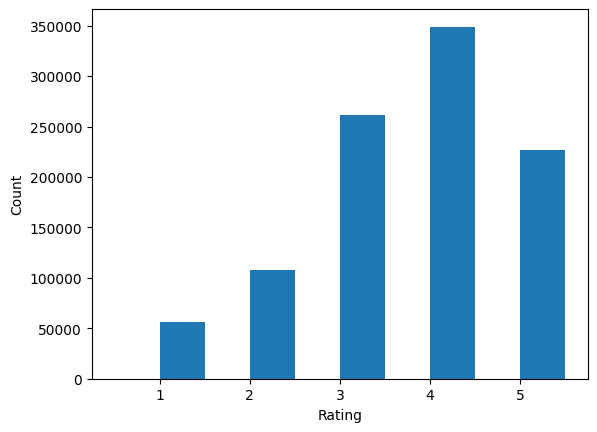

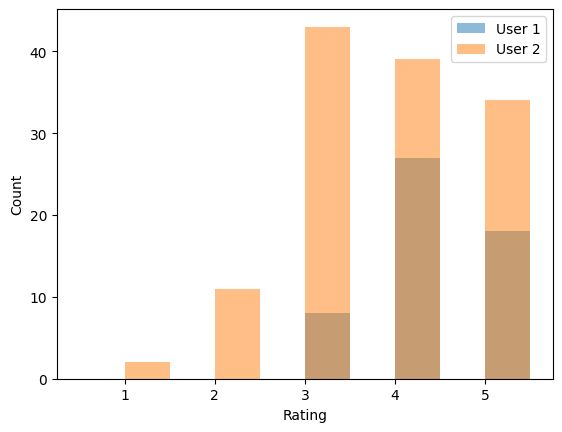

In [6]:
# to create histograms and identify overlapping in the MovieLens 1M dataset, we first need to decide which attribute to analyze.
# Let's choose to analyze the movie ratings attribute. 
import pandas as pd
import matplotlib.pyplot as plt

# Load ratings data
ratings_df = pd.read_csv('ratings.dat', sep='::', names=['user_id', 'movie_id', 'rating', 'timestamp'])

# Create histogram
plt.hist(ratings_df['rating'], bins=10, range=(0.5, 5.5))
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Identify overlapping
plt.hist(ratings_df[ratings_df['user_id']==1]['rating'], bins=10, range=(0.5, 5.5), alpha=0.5, label='User 1')
plt.hist(ratings_df[ratings_df['user_id']==2]['rating'], bins=10, range=(0.5, 5.5), alpha=0.5, label='User 2')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend()
plt.show()


# The first histogram shows the distribution of movie ratings across all users in the dataset. The x-axis represents the rating value and the y-axis represents the count of ratings that fall into each bin. The histogram shows that the most common rating is 4.0, and that the distribution of ratings is skewed towards higher values.

# The second histogram shows the ratings of two specific users (user 1 and user 2) on the same graph, with different colors and a legend to distinguish them. The overlapping area between the two histograms indicates that these two users have similar taste in movies.

# Inference:

#     The majority of ratings fall between 3.0 and 5.0.
#     There are very few ratings lower than 2.0, indicating that people tend to rate movies positively.
#     The overlapping area between user 1 and user 2's ratings suggests that these two users have similar taste in movies.

5.    Draw different types of scatter plot.(using seaborn library) 

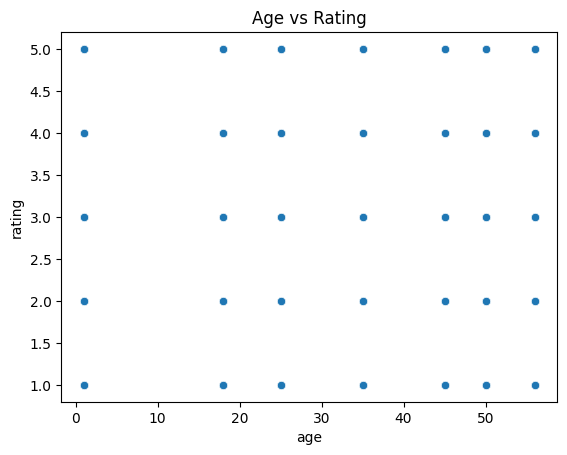

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


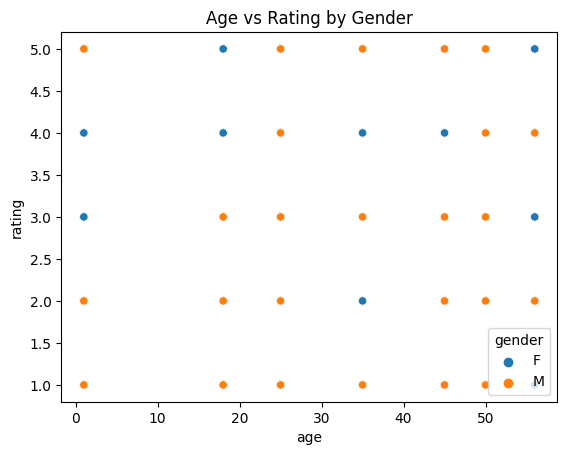

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


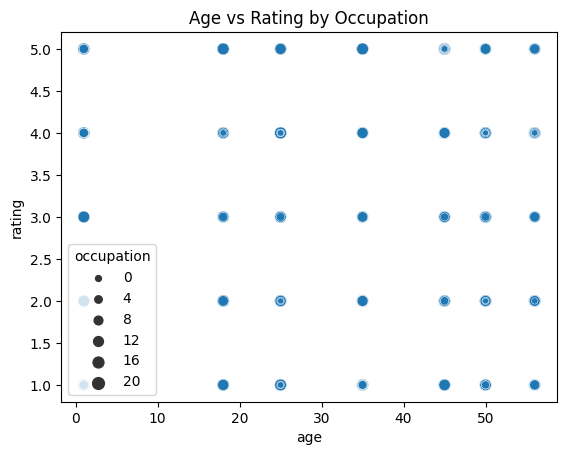

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


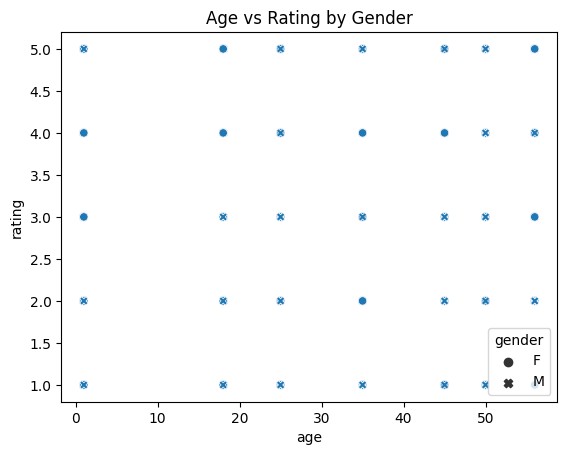

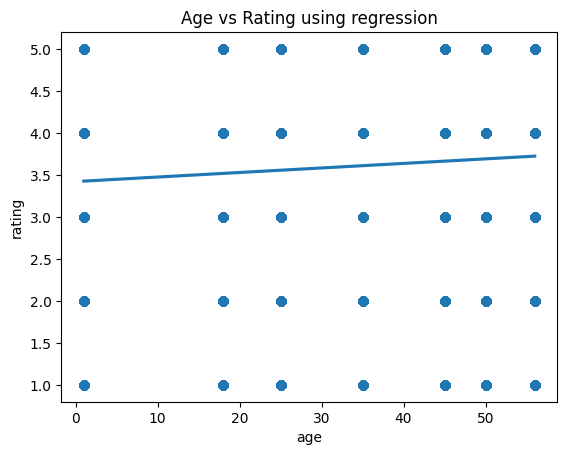

In [7]:
# Merge dataframes
data = pd.merge(pd.merge(ratings, users), movies)

# Basic scatter plot
sns.scatterplot(x='age', y='rating', data=data)
plt.title('Age vs Rating')
plt.show()

# Scatter plot with hue
sns.scatterplot(x='age', y='rating', hue='gender', data=data)
plt.title('Age vs Rating by Gender')
plt.show()

# Scatter plot with size
sns.scatterplot(x='age', y='rating', size='occupation', data=data)
plt.title('Age vs Rating by Occupation')
plt.show()

# Scatter plot with style
sns.scatterplot(x='age', y='rating', style='gender', data=data)
plt.title('Age vs Rating by Gender')
plt.show()

#Scatter plot using regression
sns.regplot(x='age', y='rating', data=data)
plt.title('Age vs Rating using regression')
plt.show()

6.    Univariate and multivariate analysis.

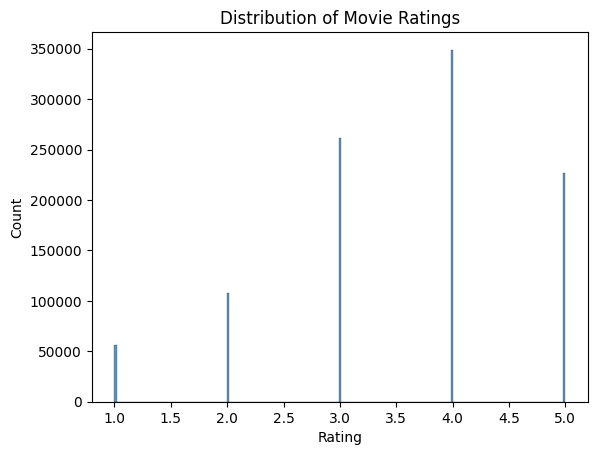

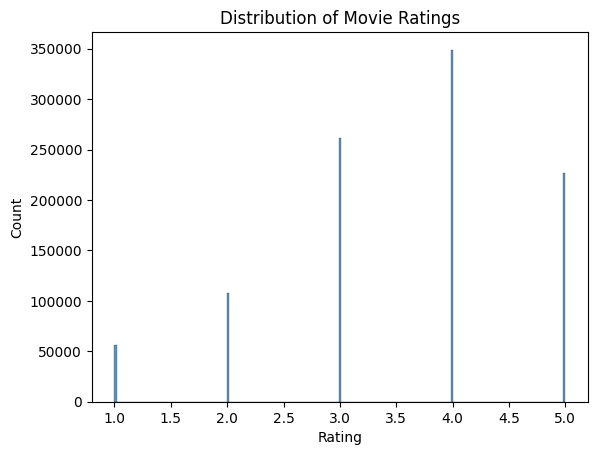

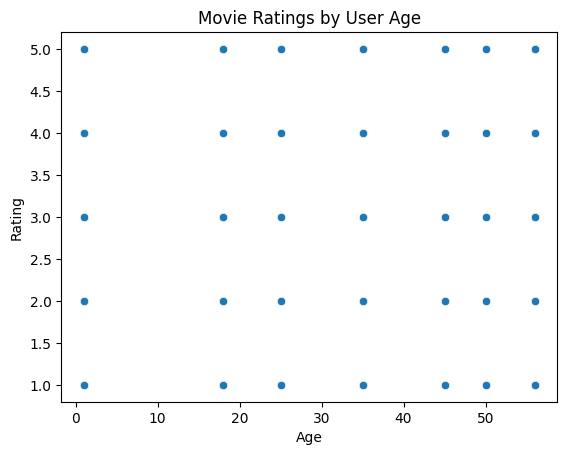

In [8]:
# Univariate analysis is the analysis of a single variable while multivariate analysis is the analysis of multiple variables to understand the relationships between them. In the context of the MovieLens 1M dataset, we can perform univariate analysis on individual variables such as movie ratings or user ages, and multivariate analysis to understand the relationships between variables such as the correlation between movie ratings and user ages.

# To perform univariate analysis, we can use techniques such as histograms and box plots to visualize the distribution of individual variables. For example, we can create a histogram of movie ratings to see the distribution of ratings across all movies:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create histogram of movie ratings
sns.histplot(ratings['rating'], kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# Univariate analysis is the analysis of a single variable while multivariate analysis is the analysis of multiple variables to understand the relationships between them. In the context of the MovieLens 1M dataset, we can perform univariate analysis on individual variables such as movie ratings or user ages, and multivariate analysis to understand the relationships between variables such as the correlation between movie ratings and user ages.

# To perform univariate analysis, we can use techniques such as histograms and box plots to visualize the distribution of individual variables. For example, we can create a histogram of movie ratings to see the distribution of ratings across all movies:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create histogram of movie ratings
sns.histplot(ratings['rating'], kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# To perform multivariate analysis, we can use techniques such as scatter plots and heat maps to visualize the relationships between variables. For example, we can create a scatter plot of movie ratings versus user ages to see if there is a correlation between the two:

# Merge ratings and users data
data = pd.merge(ratings, users, on='user_id')

# Create scatter plot of movie ratings versus user ages
sns.scatterplot(data=data, x='age', y='rating')
plt.title('Movie Ratings by User Age')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.show()

# Overall, univariate and multivariate analysis can provide valuable insights into the patterns and relationships in a dataset, helping to guide further exploration and analysis.

#  Q2. Diabetics datasets :                   

# Data Exploration: This includes inspecting the data, visualizing the data, and cleaning the data. Some of the steps used are as follows:

1. Viewing the data statistics.

In [9]:
import pandas as pd

# Load the Diabetics dataset
df = pd.read_csv('diabetes.csv')

# View the first 5 rows of the dataset
print(df.head())

# View the data statistics
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

2. Finding out the dimensions of the dataset, the variable names, the data types, etc.



In [10]:
# Print the dimensions of the dataset
print('Dimensions of the dataset:', df.shape)

# Print the variable names
print('Variable names:', list(df.columns))

# Print the data types
print('Data types:')
print(df.dtypes)

Dimensions of the dataset: (768, 9)
Variable names: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Data types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


3. Checking for null values.



In [11]:
# checking for null values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


4. Inspecting the target variable using pie plot and count plot.


0    500
1    268
Name: Outcome, dtype: int64


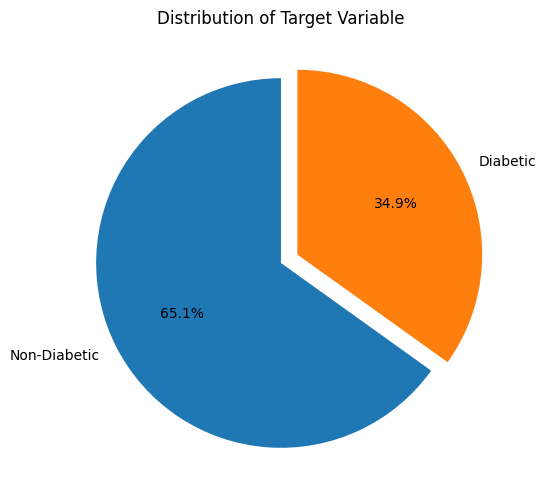

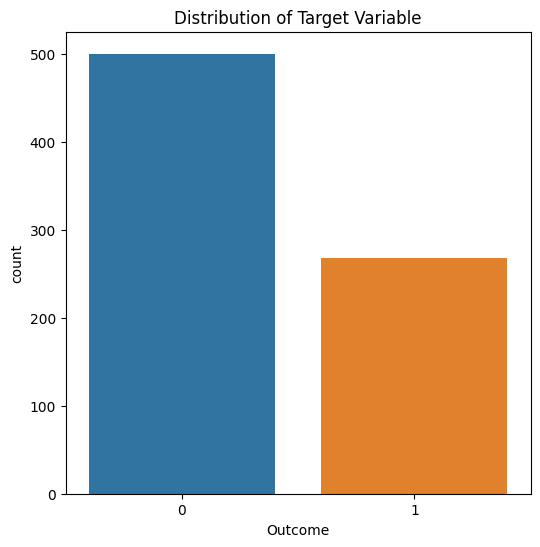

In [12]:
# Inspect target variable
print(df['Outcome'].value_counts())

# Visualize target variable using pie plot
plt.figure(figsize=(6,6))
plt.pie(df['Outcome'].value_counts(), labels=['Non-Diabetic', 'Diabetic'], 
        autopct='%1.1f%%', startangle=90, explode=[0,0.1])
plt.title('Distribution of Target Variable')
plt.show()

# Visualize target variable using count plot
plt.figure(figsize=(6,6))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Target Variable')
plt.show()

5. Finding out the correlation among different features using heatmap and the bivariate relation between each pair of features using pair plot.

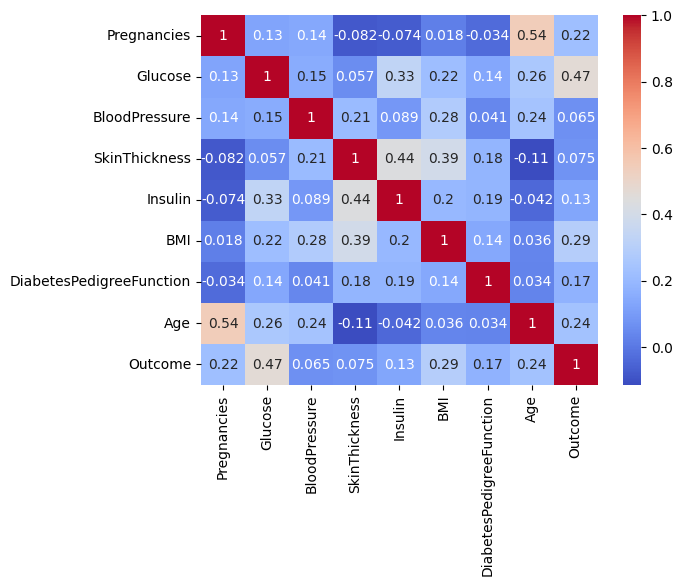

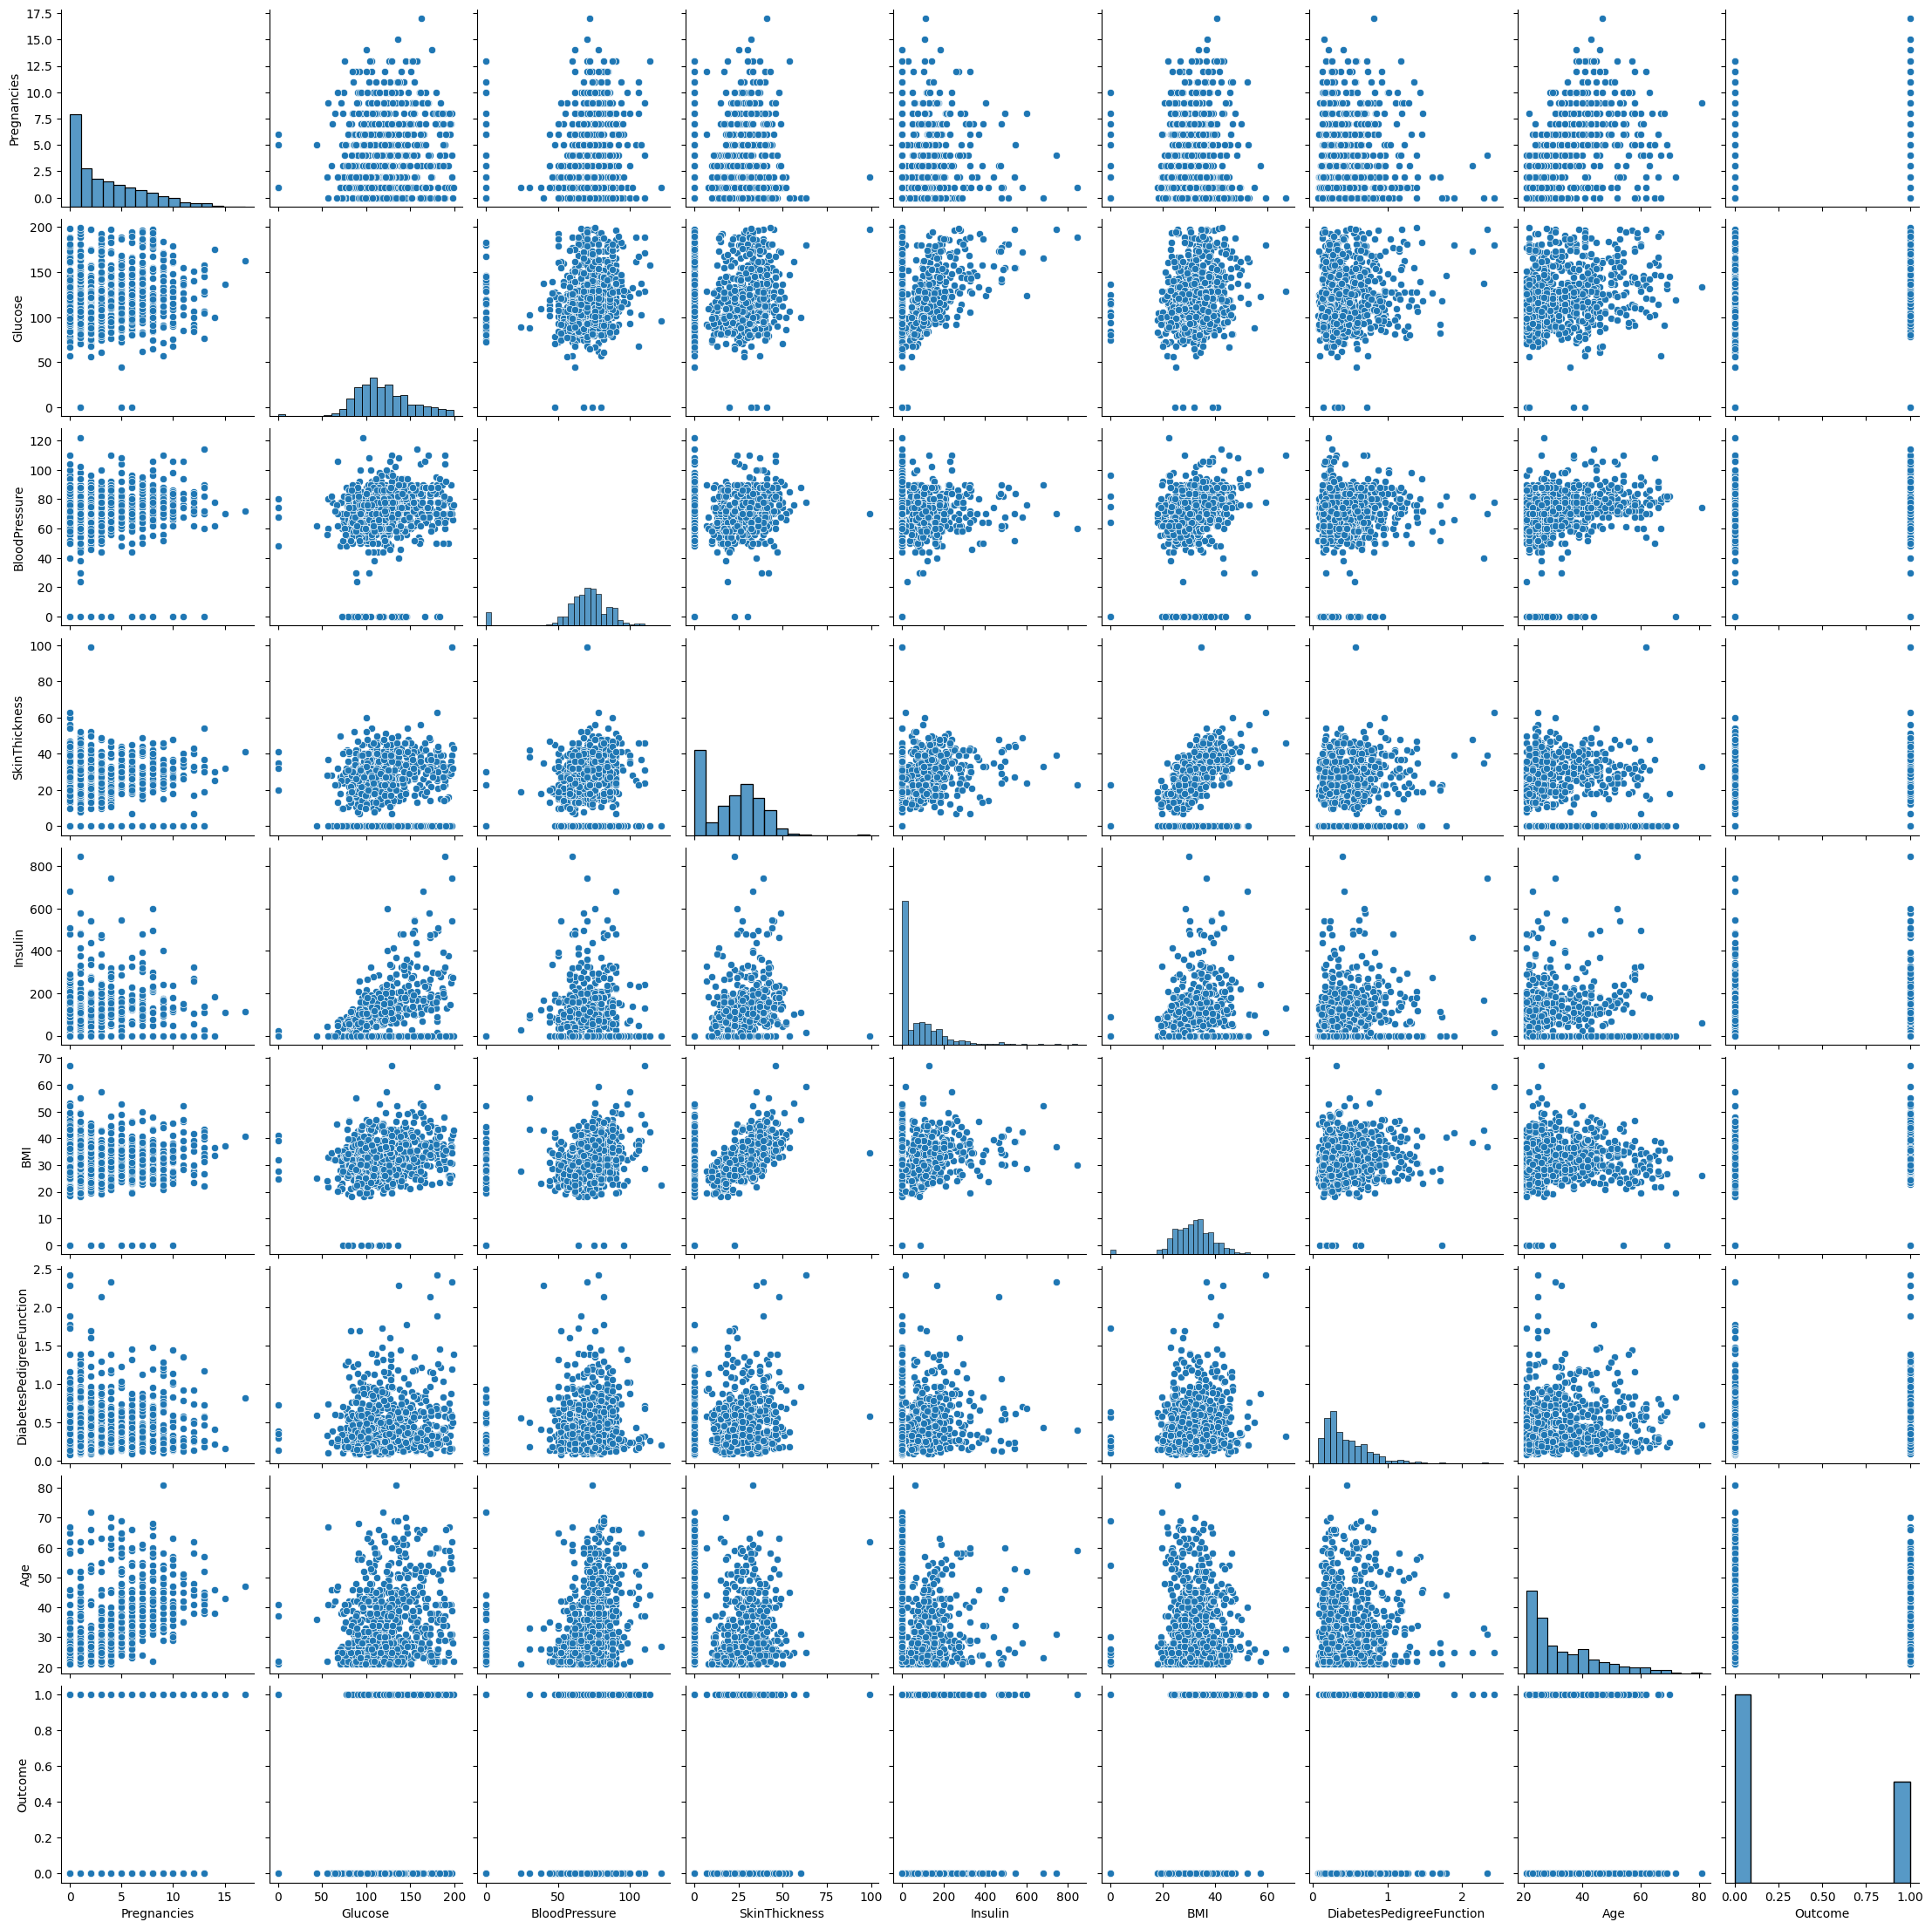

In [13]:
# Create heatmap of feature correlation
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
# Create pair plot of feature relationships
sns.pairplot(df)
plt.show()

# Model Training: 5 Classification Algorithms have been used to find out the best one. These are Logistic Regression, Support Vector Machine, Random Forest, K-Nearest Neighbours, and Naive Bayes.

# In each of the algorithms, the steps followed are as follows:

1. Importing the library for the algorithm.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

2. Creating an instance of the Classifier (with default values of parameters or by specifying certain values in certain cases).

In [15]:
# Split dataset into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the models
log_reg = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
nb = GaussianNB()


3. Training the model on the train set.

In [16]:
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
nb.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

4. Prediction on the test set using the trained model.

In [17]:
# Make predictions on the test set
log_reg_preds = log_reg.predict(X_test)
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)
knn_preds = knn.predict(X_test)
nb_preds = nb.predict(X_test)


5. Calculating the accuracy of the prediction.

In [18]:
# Calculate the accuracy of each model
log_reg_acc = accuracy_score(y_test, log_reg_preds)
svm_acc = accuracy_score(y_test, svm_preds)
rf_acc = accuracy_score(y_test, rf_preds)
knn_acc = accuracy_score(y_test, knn_preds)
nb_acc = accuracy_score(y_test, nb_preds)

# Print the accuracy of each model
print("Logistic Regression Accuracy: {:.2f}%".format(log_reg_acc*100))
print("SVM Accuracy: {:.2f}%".format(svm_acc*100))
print("Random Forest Accuracy: {:.2f}%".format(rf_acc*100))
print("KNN Accuracy: {:.2f}%".format(knn_acc*100))
print("Naive Bayes Accuracy: {:.2f}%".format(nb_acc*100))

Logistic Regression Accuracy: 74.68%
SVM Accuracy: 76.62%
Random Forest Accuracy: 75.97%
KNN Accuracy: 66.23%
Naive Bayes Accuracy: 76.62%
